In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam

import pandas as pd

Using TensorFlow backend.


In [2]:
##Reading the Input Train dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
from sklearn.model_selection import train_test_split # the needed split-function imported from scikit-learn

train_set, test_set = train_test_split(df_train, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['label'], axis=1) #Dropping 'label', the predicted variable 
y_train_set = train_set['label'] # keeping 'label', the predicted variable 

X_test_set = test_set.drop(['label'], axis=1)
y_test_set = test_set['label']

# Double checking with the shape-function that the results are as expected:

# X_train_set.shape = (33600, 784)
# y_train_set.shape = (33600,)

# X_test_set.shape = (8400, 784)
# y_test_set.shape =n (8400,)

In [4]:
df_train_label_array = y_train_set.as_matrix() #creates a numpy array of the df
df_train_image_array = X_train_set.as_matrix() #creates a numpy array of the df

df_test_image_array = X_test_set.as_matrix()
df_test_label_array = y_test_set.as_matrix()

# Again, doubel checking with the shape-function that the results are as expected also for the numpy arrays:
#df_train_label_array.shape # (33600,)
#df_train_image_array.shape # (33600, 784)

#df_test_image_array.shape # (8400, 784)
#df_test_label_array.shape # (8400,)

In [7]:
train_images = df_train_image_array.reshape(33600, 784) #(33600, 784)
test_images = df_test_image_array.reshape(8400, 784) # (8400, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
#test_images
print(train_images.shape)

(33600, 784)


In [8]:
train_labels = keras.utils.to_categorical(df_train_label_array, 10)
test_labels = keras.utils.to_categorical(df_test_label_array, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


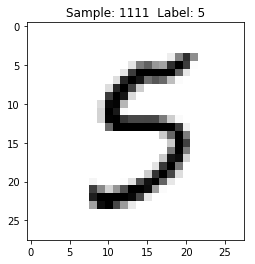

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


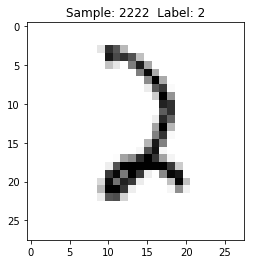

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


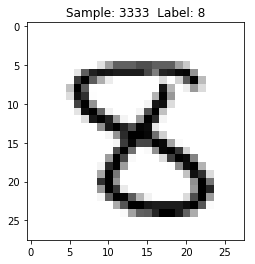

In [9]:

import matplotlib.pyplot as plt
%matplotlib inline

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num]) #df_train_label_array
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0) #df_train_label_array
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    #plt.subplot(4,4,i)
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1111) #the 1111st image in the Training set
display_sample(2222) #the 2222nd image in the Training set
display_sample(3333) #the 3333rd image in the Training set

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels,
                    batch_size=50, 
                    epochs=20, 
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 27s - loss: 0.3906 - acc: 0.8773 - val_loss: 0.1758 - val_acc: 0.9450
Epoch 2/20
 - 22s - loss: 0.1912 - acc: 0.9418 - val_loss: 0.1213 - val_acc: 0.9608
Epoch 3/20
 - 22s - loss: 0.1578 - acc: 0.9517 - val_loss: 0.1037 - val_acc: 0.9683
Epoch 4/20
 - 22s - loss: 0.1281 - acc: 0.9597 - val_loss: 0.1066 - val_acc: 0.9673
Epoch 5/20
 - 23s - loss: 0.1151 - acc: 0.9640 - val_loss: 0.0966 - val_acc: 0.9707
Epoch 6/20
 - 23s - loss: 0.1075 - acc: 0.9670 - val_loss: 0.0911 - val_acc: 0.9740
Epoch 7/20
 - 22s - loss: 0.1022 - acc: 0.9673 - val_loss: 0.0894 - val_acc: 0.9730
Epoch 8/20
 - 22s - loss: 0.0883 - acc: 0.9718 - val_loss: 0.0840 - val_acc: 0.9749
Epoch 9/20
 - 22s - loss: 0.0858 - acc: 0.9730 - val_loss: 0.0924 - val_acc: 0.9736
Epoch 10/20
 - 22s - loss: 0.0811 - acc: 0.9740 - val_loss: 0.0961 - val_acc: 0.9732
Epoch 11/20
 - 22s - loss: 0.0799 - acc: 0.9742 - val_loss: 0.0923 - val_acc: 0.9749
Epoch 12/20
 - 22s - loss

In [14]:

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09382469650919249
Test accuracy: 0.9766666666666667


In [15]:

predictions = model.predict_classes(df_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)